# Analyse 2M++ resims

In [1]:
import numpy as np
import matplotlib.pylab as plt
from src.read_all_h5 import explore_chain, rebuild_spliced_h5
from src.special_regions import *
import healpy as hp
%matplotlib inline

/scratch/pyenvs/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Just some helper Routines

In [2]:
#little reading routine
def load_resim(fname,ncpu=1):
    print ("reading : ", fname)
  
    if ncpu>0:
            a=rebuild_spliced_h5(fname,['u_pos','u_vel'],ncpu,verbose=False)
            return np.array(a["u_pos"][...]),np.array(a["u_vel"][...])
    else:
            print ('Error: need number of processes to read files !')
    
    return None
#print special regions
special_coords.keys()

#set observer
corner=np.array([-0.5*677.77,-0.5*677.77,-0.5*677.77])

#change coordinates
def cart2sphere(pos,corner=np.array([0,0,0]),rmax=100):
    r   = np.sqrt((pos[:,0]+corner[0])**2+(pos[:,1]+corner[1])**2+(pos[:,2]+corner[2])**2)
    foo=np.where(r<rmax)
    r   = r[foo]
    
    phi,theta=hp.vec2ang(np.array([pos[foo][:,0]+corner[0],pos[foo][:,1]+corner[1],pos[foo][:,2]+corner[2]]).T, lonlat=True)
    
    return r,phi,theta


def get_densities(r,ra,dec,rmax,region='full'):
    rho_mean=(512./677.77)**3
    
    if(region=='full'):
        hist, binEdges = np.histogram(r,bins=600, density=False,range=[0,rmax])
        dv             = np.pi*4./3.*(binEdges[1:]**3-binEdges[:-1]**3)
    else:
        foo,da = sky_region(region,ra,dec)
        hist, binEdges = np.histogram(r[foo],bins=600, density=False,range=[0,rmax])
        dv             = da/3.*(binEdges[1:]**3-binEdges[:-1]**3)
        
    
    bincenters     = 0.5*(binEdges[1:]+binEdges[:-1])
    
    rho            = hist/dv
    delta          = rho/rho_mean -1.
    
    aux       = np.cumsum(hist)
    auxv      = 4./3.*np.pi*binEdges[1:]**3
    rho_cum   = aux/auxv
    delta_cum = rho_cum/rho_mean-1.
    
    return bincenters,delta, binEdges[1:], delta_cum 

def find_ncpu(fbase):
    import glob
    nn = len(glob.glob(fbase+"*"))
    return nn

def plot_radial_density(r,ra,dec):
    
    rmax=300
    foo=sky_region('R3',ra,dec)
    x_R1,delta_R1,x_cum_R1,delta_cum_R1=get_densities(r[foo],rmax)

    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(12,4))
    
    
    ax1.set_xlim([0,rmax])
    ax1.set_ylim([-1,1])
    ax1.set_xlabel(r'$r$')
    ax1.set_ylabel(r'$\delta(r)$')
    ax1.plot(x_R1,delta_R1,color='red')
    ax1.plot(x_R1,delta_R1*0.,color='black',linestyle='--')
    
    ax2.set_xlim([0,rmax])
    ax2.set_ylim([-1,1])
    ax2.set_xlabel(r'$r$')
    ax2.yaxis.set_ticks_position('none') 
    ax2.plot(x_R1,delta_R1,color='red')
    ax2.plot(x_R1,delta_R1*0.,color='black',linestyle='--')
    
    ax3.set_xlim([0,rmax])
    ax3.set_ylim([-1,1])
    ax3.set_xlabel(r'$r$')
    ax3.yaxis.set_ticks_position('none') 
    ax3.plot(x_R1,delta_R1,color='red')
    ax3.plot(x_R1,delta_R1*0.,color='black',linestyle='--')
    
    
    plt.show()
    
fins=['output_7430.h5',
'output_7440.h5',
'output_7450.h5',
'output_7460.h5',
'output_7470.h5',
'output_7480.h5',
'output_7490.h5',
'output_7500.h5',
'output_7510.h5',
'output_7520.h5',
'output_7530.h5',
'output_7540.h5',
'output_7550.h5',
'output_7570.h5',
'output_7590.h5',
'output_7610.h5',
'output_7630.h5',
'output_7650.h5',
'output_7670.h5',
'output_7690.h5',
'output_7710.h5',
'output_7730.h5',
'output_7750.h5',
'output_7770.h5',
'output_7790.h5',
'output_7810.h5',
'output_7830.h5',
'output_7850.h5',
'output_7870.h5',
'output_7890.h5',
'output_7910.h5',
'output_7930.h5',
'output_7950.h5',
'output_7970.h5',
'output_7990.h5',
'output_8010.h5',
'output_8030.h5',
'output_8050.h5',
'output_8070.h5',
'output_8090.h5',
'output_8110.h5',
'output_8130.h5',
'output_8150.h5',
'output_8170.h5',
'output_8190.h5',
'output_8210.h5',
'output_8230.h5',
'output_8250.h5',
'output_8270.h5',
'output_8290.h5',
'output_8310.h5',
'output_8330.h5',
'output_8350.h5',
'output_8370.h5',
'output_8390.h5',
'output_8410.h5',
'output_8430.h5',
'output_8450.h5',
'output_8470.h5',
'output_8490.h5',
'output_8510.h5',
'output_8530.h5',
'output_8550.h5',
'output_8570.h5',
'output_8590.h5',
'output_8610.h5',
'output_8630.h5',
'output_8650.h5',
'output_8670.h5',
'output_8690.h5',
'output_8710.h5',
'output_8730.h5',
'output_8750.h5',
'output_8770.h5',
'output_8790.h5',
'output_8810.h5',
'output_8830.h5',
'output_8850.h5',
'output_8870.h5',
'output_8890.h5',
'output_8910.h5',
'output_8930.h5',
'output_8950.h5',
'output_8970.h5',
'output_8990.h5']

In [ ]:
#get Cartesian coordinates for coma:
pcoma,rc=get_objpos_range('coma')

#load particles
rmax=300
xx_full=[]
xx_R1=[]
xx_R2=[]
xx_R3=[]


rcoma=[]
racoma=[]
deccoma=[]
velcoma=[]
for fname in fins:
    ncpu=find_ncpu('/data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/'+fname)
    pos1,vel1=load_resim('/data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/'+fname,ncpu=ncpu)
    
    dcoma   = np.sqrt((pos1[:,0]+corner[0]-pcoma[0])**2+(pos1[:,1]+corner[1]-pcoma[1])**2+(pos1[:,2]+corner[2]-pcoma[2])**2)
    foo=np.where(dcoma<20.)
    
    r,ra,dec = cart2sphere(pos1,corner=corner,rmax=2000)
    
    print ('hi',np.min(ra),np.max(ra),np.min(dec),np.max(dec))
    
    velcoma.append(vel1[foo])
    rcoma.append(r[foo])
    racoma.append(ra[foo])
    deccoma.append(dec[foo])
    
    np.savez('/scratch/jasche/coma_particles', r = rcoma, ra = racoma, dec = deccoma, vel=velcoma)
    
    xx_full.append(get_densities(r,ra,dec,rmax))
    
    xx_R1.append(get_densities(r,ra,dec,rmax,region='R1'))
    xx_R2.append(get_densities(r,ra,dec,rmax,region='R2'))
    xx_R3.append(get_densities(r,ra,dec,rmax,region='R3'))
    np.savez('/scratch/jasche/home_radial_dens', full = xx_full, R1=xx_R1, R2=xx_R2,R3=xx_R3)

reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7430.h5
hi 7.379306853242552e-07 359.9999969390372 -89.99126552546272 89.99550581118774
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7440.h5
hi 2.9451484856277518e-06 359.999997570849 -89.9889787218639 89.99511084033364
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7450.h5
hi 3.385283781994141e-07 359.99999553714446 -89.98808898802002 89.99533411827332
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7460.h5
hi 1.8074473344467155e-06 359.9999977874951 -89.98371284950048 89.99201676085508
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7470.h5
hi 3.2910328257955735e-06 359.99999773190456 -89.99272054208683 89.99425095008178
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7480.h5
hi 1.1389157106431394e-05 359.99999830154223 -89.98472794623657 89.99811377865286
reading :  /data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7490.h5
hi 2.874475098358866e-06 359.999

In [ ]:
r,ra,dec = cart2sphere(pos1,corner=corner,rmax=300)

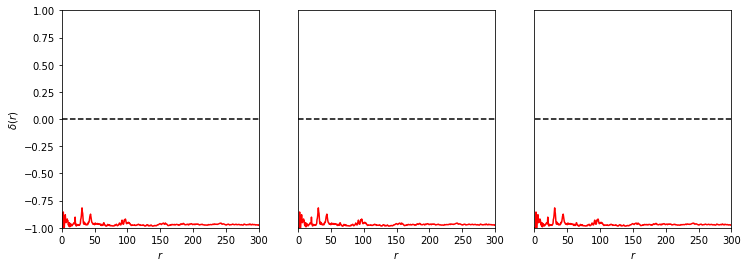

In [12]:
plot_radial_density(r,ra,dec)


In [66]:
print (np.shape(pos1)[0]**(1./3.))

511.99999999999983


In [25]:
import glob
aux = glob.glob("/data/lavaux/PM_HOT_0.30_try2_epsilon_0.01/output_7610.h5_*")
print(len(aux))



10
